<a href="https://colab.research.google.com/github/lukehdez95/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [1]:
import pandas as pd 

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

Check for missing/null values in the three dataframes

In [3]:
### YOUR CODE HERE ###
print(cell_phones.shape)
cell_phones.isnull().sum()

(9427, 3)


geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [4]:
### YOUR CODE HERE ###
print(population.shape)
population.isnull().sum()

(59297, 3)


geo                 0
time                0
population_total    0
dtype: int64

In [5]:
### YOUR CODE HERE ###
print(geo_country_codes.shape)
geo_country_codes.isnull().sum()

(273, 21)


geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_sdg_ldc                 24
un_sdg_region              25
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64

### Part 2 - Merge data

First, merge the `cell_phones` and `population` dataframes (with an inner merge on `geo` and `time`).

The resulting dataframe's shape should be: (8786, 4)

In [9]:
### YOUR CODE HERE ###
df1 = pd.merge(cell_phones,population,on=['geo','time'])
df1.shape

(8786, 4)

Then, select only the `geo` and `country` columns from the `geo_country_codes` dataframe, and merge with your population and cell phone data.

The resulting dataframe's shape should be: (8786, 5)

In [14]:
### YOUR CODE HERE ###
gcc = geo_country_codes[['geo','country']]
df2 = pd.merge(df1,gcc)
df2.shape

(8786, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.230448 cell phones per person in the United States in 2017.)

In [19]:
### YOUR CODE HERE ###
df2.head()
df2['cells_per_person'] = df2['cell_phones_total']/df2['population_total']
df2.loc[(df2['time']==2017) & (df2['country']=='United States')]

,geo,time,cell_phones_total,population_total,country,cells_per_person
8319,usa,2017,400000000.0,325084758,United States,1.230448


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2018, and there are 195 unique countries represented.)

In [27]:
### YOUR CODE HERE ###

print(df2.describe)
df2.describe(exclude='number')

<bound method NDFrame.describe of       geo  time  ...      country  cells_per_person
0     afg  1960  ...  Afghanistan          0.000000
1     afg  1965  ...  Afghanistan          0.000000
2     afg  1970  ...  Afghanistan          0.000000
3     afg  1975  ...  Afghanistan          0.000000
4     afg  1976  ...  Afghanistan          0.000000
...   ...   ...  ...          ...               ...
8781  zwe  2014  ...     Zimbabwe          0.868397
8782  zwe  2015  ...     Zimbabwe          0.923470
8783  zwe  2016  ...     Zimbabwe          0.917934
8784  zwe  2017  ...     Zimbabwe          0.989850
8785  zwe  2018  ...     Zimbabwe          0.894048

[8786 rows x 6 columns]>


,geo,country
count,8786,8786
unique,195,195
top,mar,Austria
freq,47,47


In [30]:
### YOUR CODE HERE ###
df3 = df2[df2['time']==2017].sort_values(by=['cell_phones_total'],ascending=False).head()

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,469,882,500 |
|    ?    |     1,168,902,277 |
|    ?    |       435,193,605 |
|    ?    |       400,000,000 |
|    ?    |       227,299,663 |


In [31]:
### YOUR CODE HERE ###
df3[['country','cell_phones_total']]

,country,cell_phones_total
1530,China,1.469882e+09
3674,India,1.168902e+09
3627,Indonesia,4.351936e+08
8319,United States,4.000000e+08
6783,Russia,2.272997e+08


#Explanatory visualizations:

Explain why the figure below **cannot** be graphed as a pie chart.


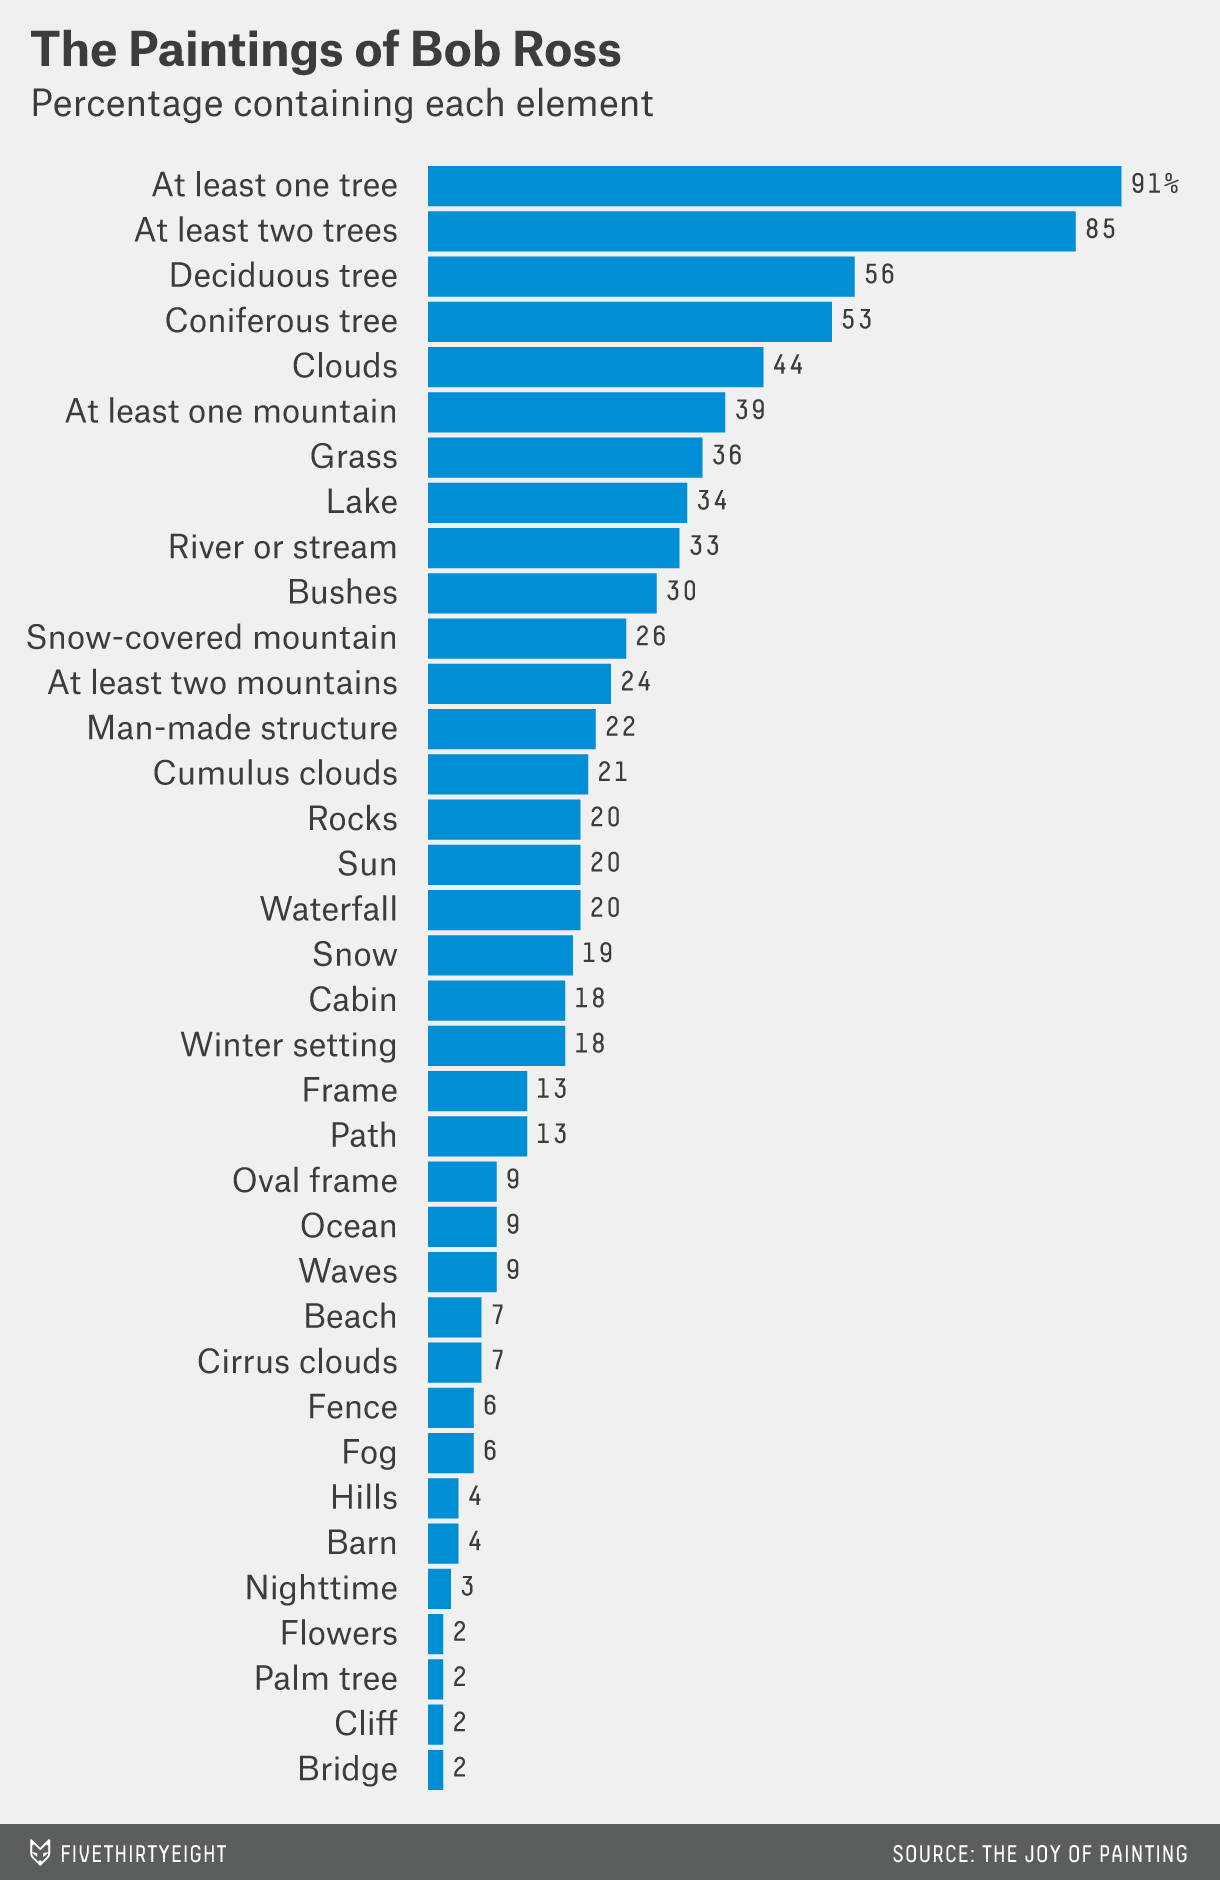

In [ ]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(png, width=500)
display(example)

Pie charts are meant to compare parts of a whole not compare whole paintings to each other, this information is better suited to a bar plot like it is currently being displayed as. Also with how many features are a part of this data, it would make it very difficult to get a grasp of how many paintings include some of the less frequent features. Which would make it more laborious for the end user to interpret the data. Also also *Pie Charts are bad..lol*


### Import the Titanic dataset.  

In [33]:

import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()
Titanic['Parents/Children_Aboard'].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children_Aboard, dtype: int64

What type of variable (quantitative, categorical, discrete, continuous, etc.) is Parents/Children_Aboard?  

The Parents/Children_Aboard feature is quantitative, since it includes the number of parents and/or children aboard. It is also discrete because there is a finite number associated with the number of parents/children, since it is not possible to have 1.4823946439230 children aboard.

Create a visualization to show the distribution of Parents/Children_Aboard.

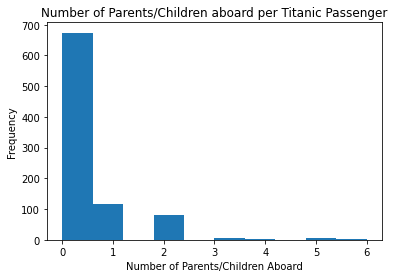

In [35]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
plt.hist(Titanic['Parents/Children_Aboard'])

plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Frequency')
plt.title('Number of Parents/Children aboard per Titanic Passenger')
plt.xticks=[0,1,2,3,4,5,6]
plt.show()

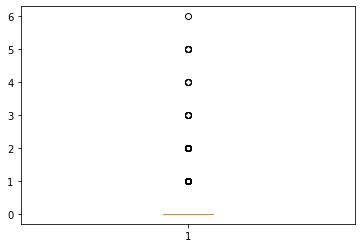

In [36]:
plt.boxplot(Titanic['Parents/Children_Aboard']); #Wanted to see if the boxplot would help, me better understand the data, showed me that there were a lot of outliers.

Describe the distribution of Parents/Children_Aboard.

Unimodal and Positively Skewed.